# **TSF GRIP INTERNSHIP : TASK 2**

**Realised by : Yassine GUENIDI**

* **Importing Libraries**  


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets


*  **Load the dataset and create the dataframe**



In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


*  **Preprocessing**

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


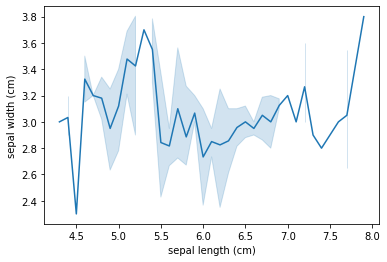

In [8]:
# draw lineplot 
sns.lineplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df)

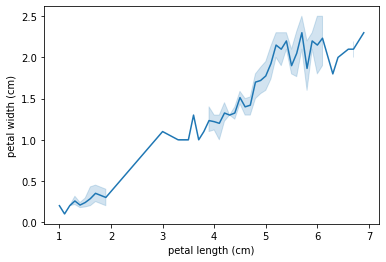

In [9]:
# draw lineplot 
sns.lineplot(x="petal length (cm)", y="petal width (cm)", data=iris_df)

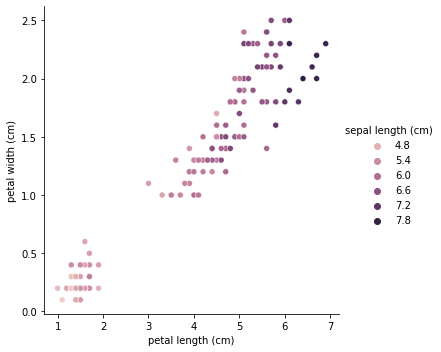

In [13]:
g = sns.relplot(
    data=iris_df,
   x="petal length (cm)", y="petal width (cm)",
    hue="sepal length (cm)",
    sizes=(10, 200)
)

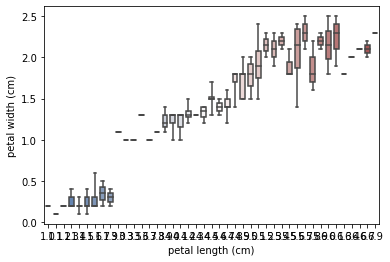

In [14]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="petal length (cm)", y="petal width (cm)", data=iris_df,
            whis=[0, 100], width=.6, palette="vlag")


In [30]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)


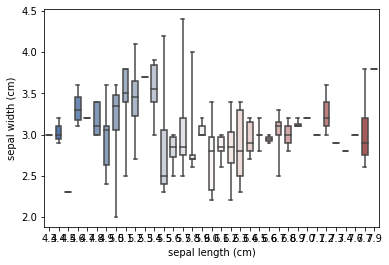

In [15]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df,
            whis=[0, 100], width=.6, palette="vlag")


*  **Exploratory Data Analysis**

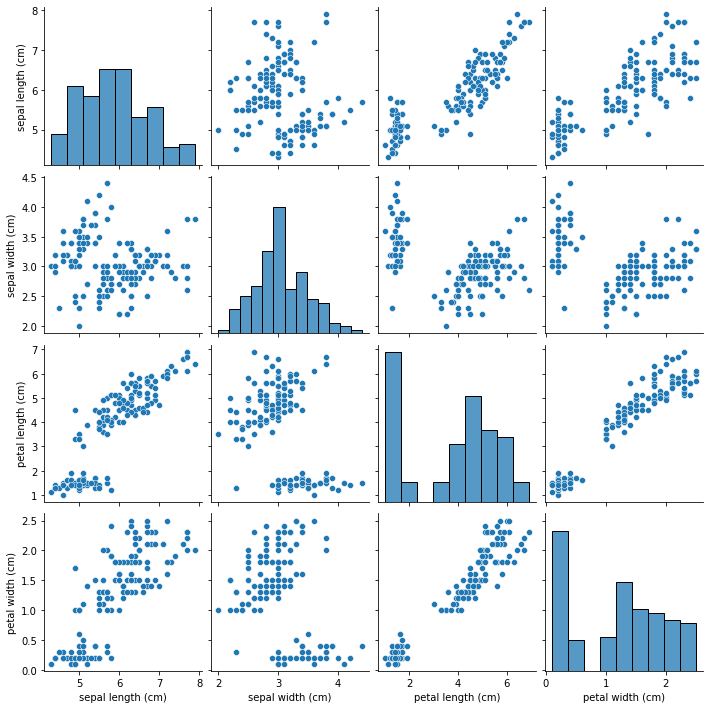

In [17]:
sns.pairplot(iris_df)

In [18]:
'''Elbow Methode'''
iris_df = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
sum_of_squared_distances=[]
K=range(2,10)
for i in K:
    Km=KMeans(n_clusters=i)
    Km=Km.fit(iris_df)#train du kmeans
    sum_of_squared_distances.append(Km.inertia_)

*  **plotting the result**

Text(0.5, 1.0, 'Elbow ethod For Optimal K')

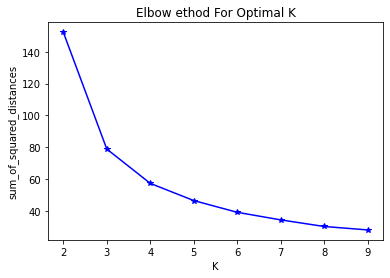

In [19]:
plt.figure()
plt.plot(K,sum_of_squared_distances,'b*-')
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow ethod For Optimal K')

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_df)
Label=kmeans.labels_
centers=kmeans.cluster_centers_

In [21]:
Label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [22]:
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

*  **plotting the result**

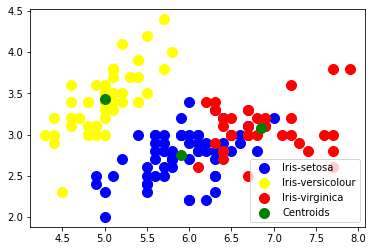

In [23]:
plt.scatter(iris_df[Label == 0, 0], iris_df[Label == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(iris_df[Label == 1, 0], iris_df[Label == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_df[Label == 2, 0], iris_df[Label == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

In [24]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

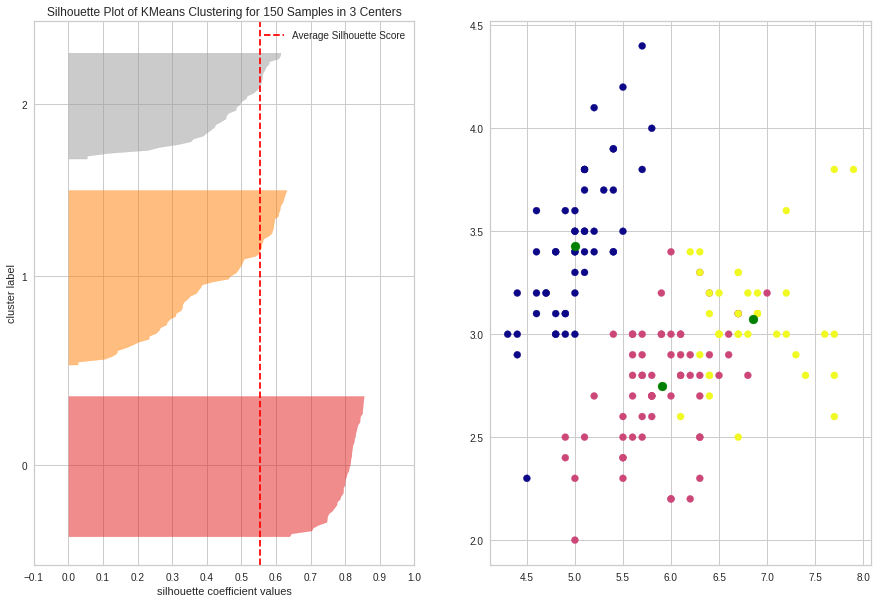

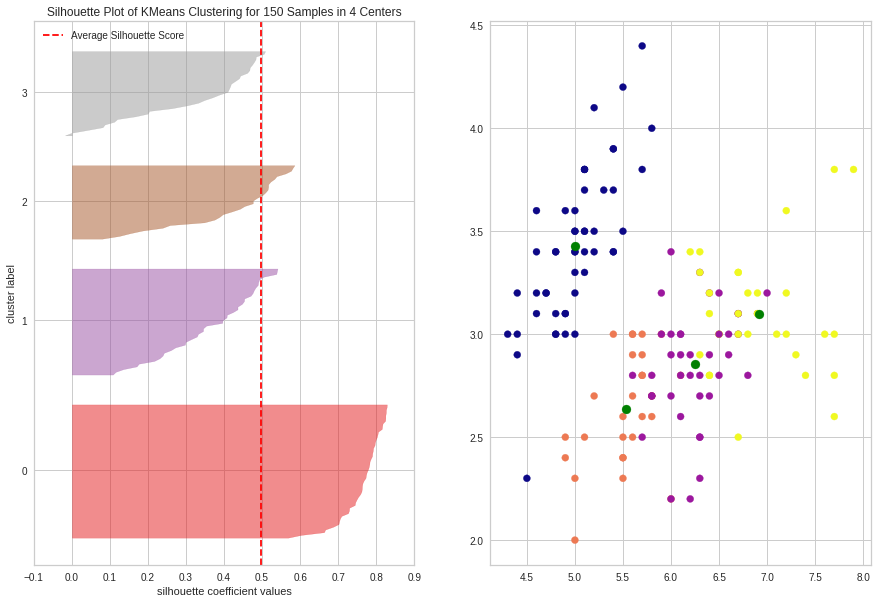

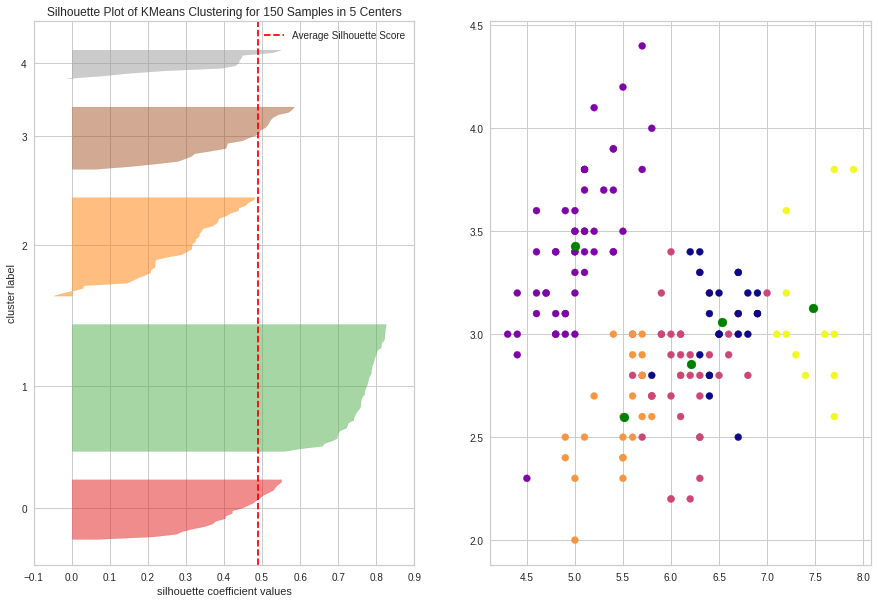

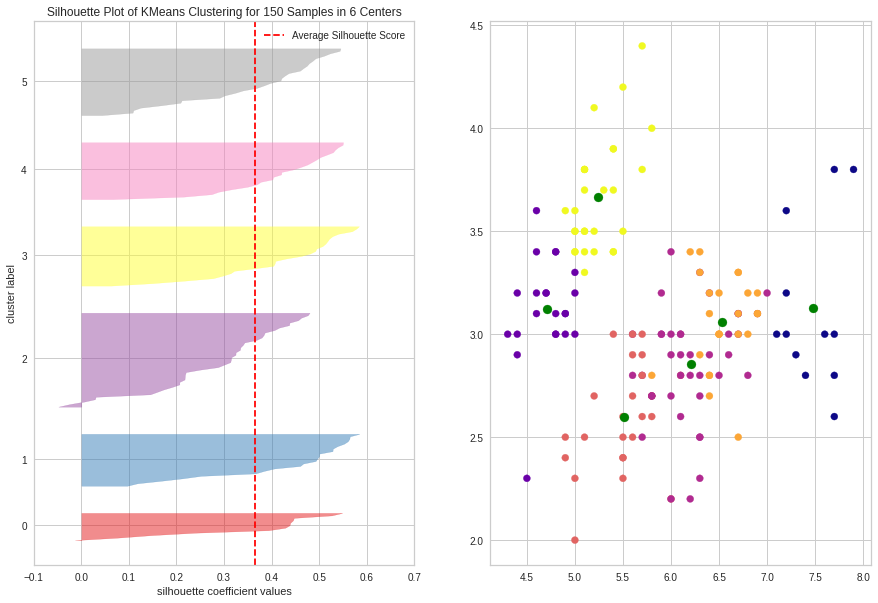

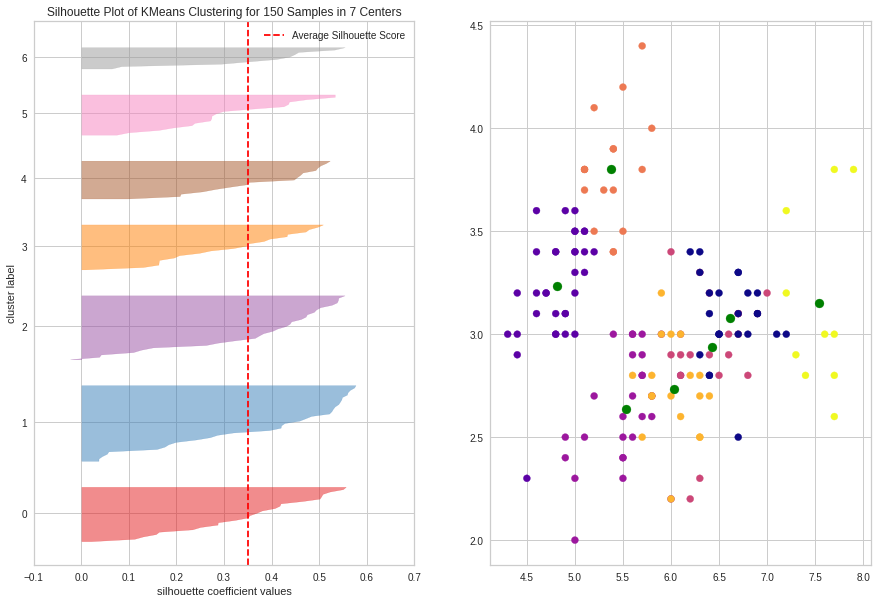

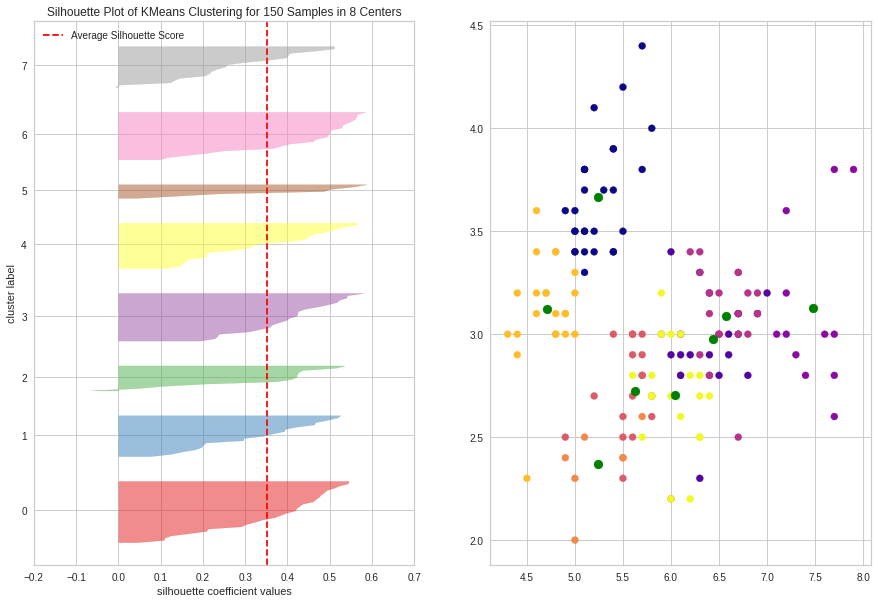

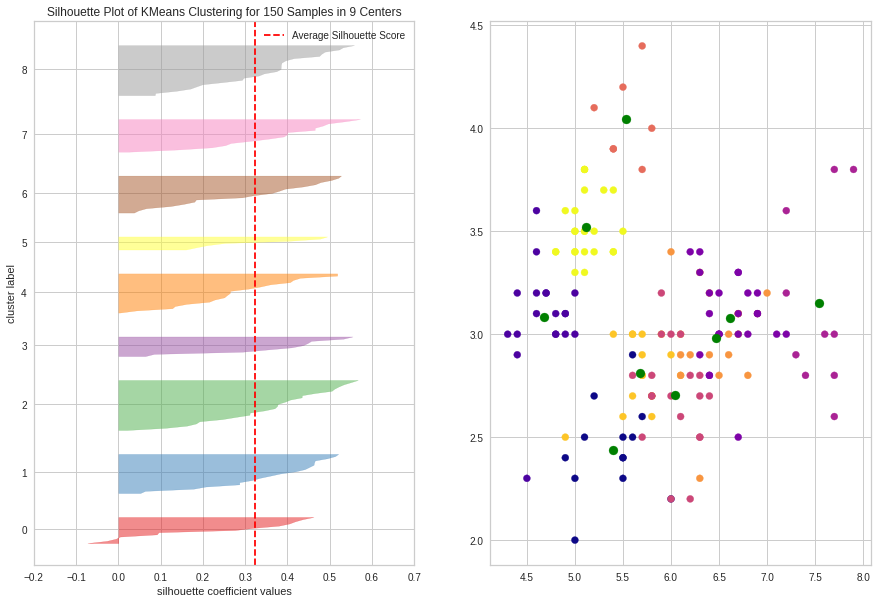

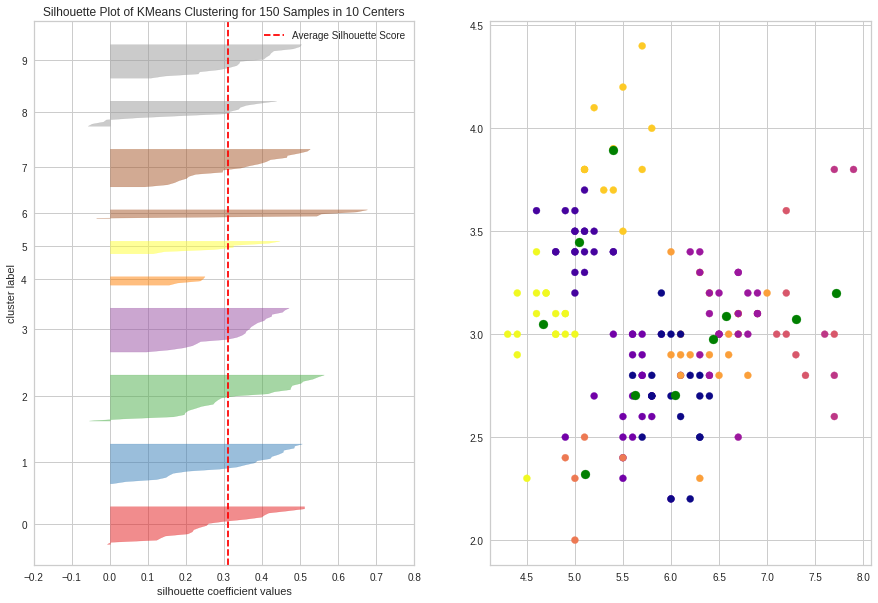

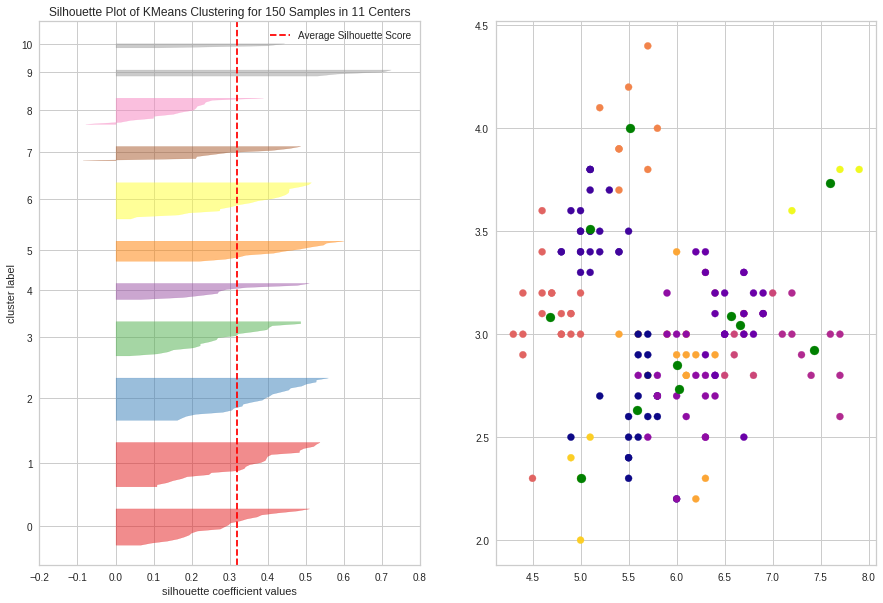

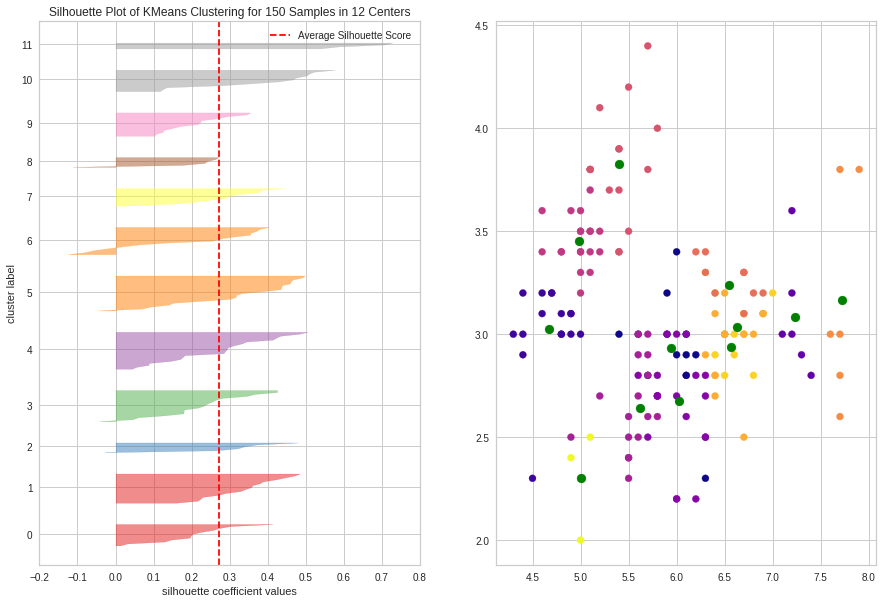

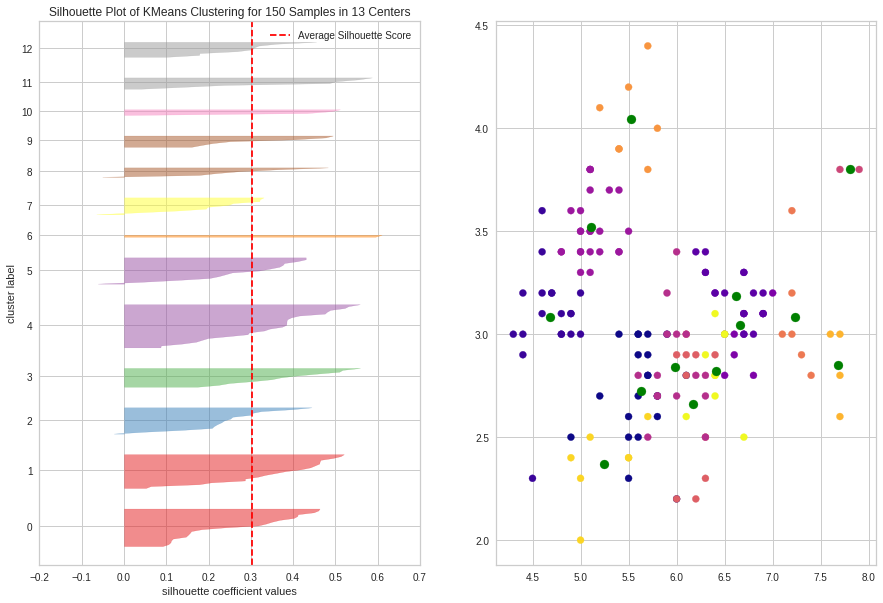

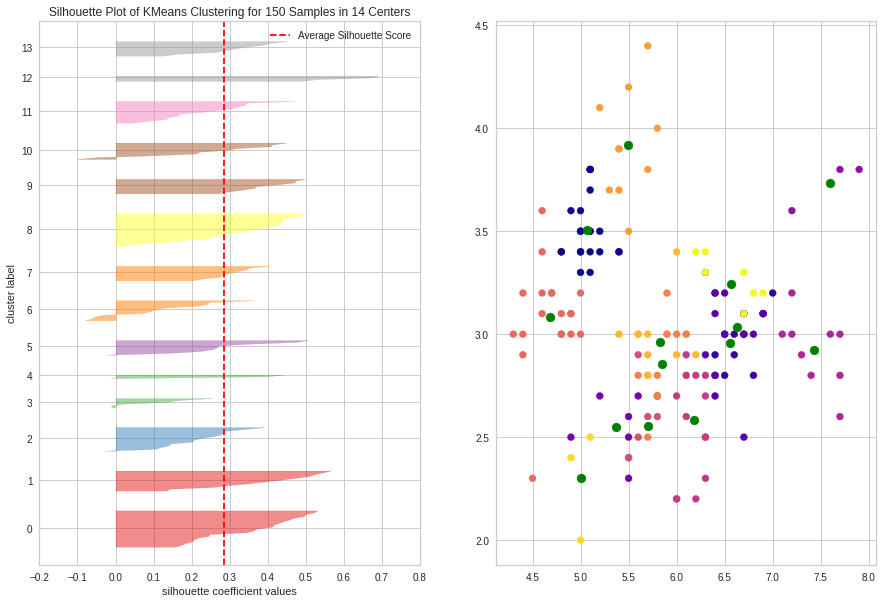

In [31]:
K=range(3,15)
for i in K:
    Km=KMeans(n_clusters=i)
    Km=Km.fit(iris_df)#train du kmeans
    labels=Km.labels_
    centers=Km.cluster_centers_
    score=silhouette_score(iris_df,labels)
   
    #print(i,":",score)
    plt.figure(figsize=(15, 10))
    plt.subplot(1,2,2)
    plt.scatter(iris_df[:,0],iris_df[:,1],c=labels,cmap="plasma") #c=labels :each cluster with each color coulour
    plt.scatter(centers[:,0],centers[:,1],c='green',s=80)
    #cmap=plasma==>use customs colors
    plt.subplot(1,2,1)
    model = SilhouetteVisualizer(Km)
    model.fit(iris_df)
    model.show()

In [32]:

k=range(3,15)
for i in k:
    cluster=KMeans(n_clusters=i)
    cluster_labels=cluster.fit_predict(iris_df)
    silhouette_avg=silhouette_score(iris_df,cluster_labels)
    print("For n_clusters=",i,"the average silhouette_score is :",silhouette_avg)

For n_clusters= 3 the average silhouette_score is : 0.5528190123564095
For n_clusters= 4 the average silhouette_score is : 0.49805050499728737
For n_clusters= 5 the average silhouette_score is : 0.48874888709310566
For n_clusters= 6 the average silhouette_score is : 0.3655218859995459
For n_clusters= 7 the average silhouette_score is : 0.3561786628965541
For n_clusters= 8 the average silhouette_score is : 0.35974549238457626
For n_clusters= 9 the average silhouette_score is : 0.33868889982170647
For n_clusters= 10 the average silhouette_score is : 0.32109490669513474
For n_clusters= 11 the average silhouette_score is : 0.2895592258823325
For n_clusters= 12 the average silhouette_score is : 0.2868383683485692
For n_clusters= 13 the average silhouette_score is : 0.28949197472865085
For n_clusters= 14 the average silhouette_score is : 0.26979215985235633


when n_cluster=3 we have the high silhouette_score
so we can choose n_cluster=3

